#Predicting the player of the position based on characteristics.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('players_fifa23.csv')

In [ ]:
df.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18539 non-null  int64  
 1   Name               18539 non-null  object 
 2   FullName           18539 non-null  object 
 3   Age                18539 non-null  int64  
 4   Height             18539 non-null  int64  
 5   Weight             18539 non-null  int64  
 6   PhotoUrl           18539 non-null  object 
 7   Nationality        18539 non-null  object 
 8   Overall            18539 non-null  int64  
 9   Potential          18539 non-null  int64  
 10  Growth             18539 non-null  int64  
 11  TotalStats         18539 non-null  int64  
 12  BaseStats          18539 non-null  int64  
 13  Positions          18539 non-null  object 
 14  BestPosition       18539 non-null  object 
 15  Club               18539 non-null  object 
 16  ValueEUR           185

In [ ]:
df.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

In [ ]:
needed_cols = ['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil',
       'ClubJoined', 'OnLoad', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
df = df[needed_cols]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18539 non-null  int64  
 1   Name               18539 non-null  object 
 2   FullName           18539 non-null  object 
 3   Age                18539 non-null  int64  
 4   Height             18539 non-null  int64  
 5   Weight             18539 non-null  int64  
 6   Nationality        18539 non-null  object 
 7   Overall            18539 non-null  int64  
 8   Potential          18539 non-null  int64  
 9   Growth             18539 non-null  int64  
 10  TotalStats         18539 non-null  int64  
 11  BaseStats          18539 non-null  int64  
 12  BestPosition       18539 non-null  object 
 13  Club               18539 non-null  object 
 14  ValueEUR           18539 non-null  int64  
 15  WageEUR            18539 non-null  int64  
 16  ReleaseClause      185

#1. Does the age of the player affect his ball control performance ?

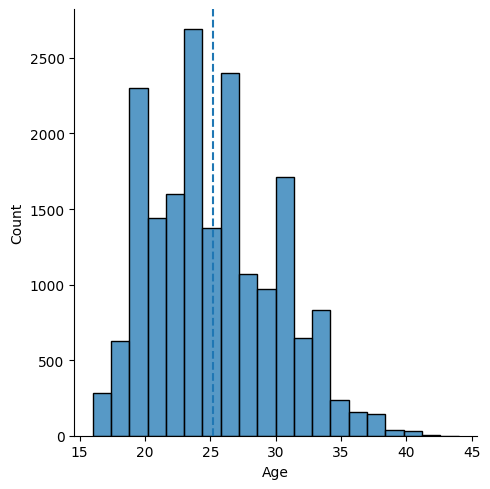

In [ ]:
sns.displot(x = df['Age'], bins=20, kde=False)
plt.axvline(np.mean(df['Age']), ls = '--')

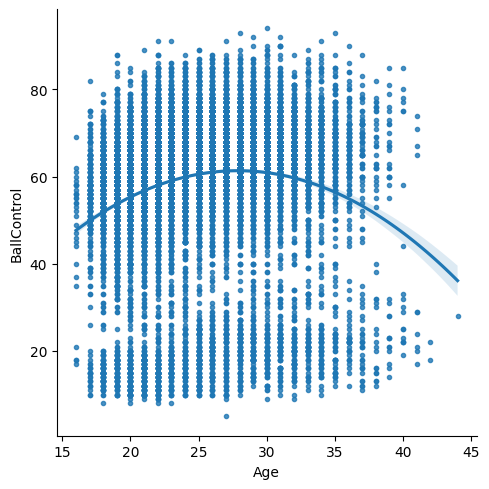

In [ ]:
sns.lmplot(data=df, x = 'Age', y = 'BallControl', markers='.', order=2)

#2. How height affects the different factors like stamina, dribbling, pace, passing, heading accuracy ?

<Axes: xlabel='Height', ylabel='Stamina'>

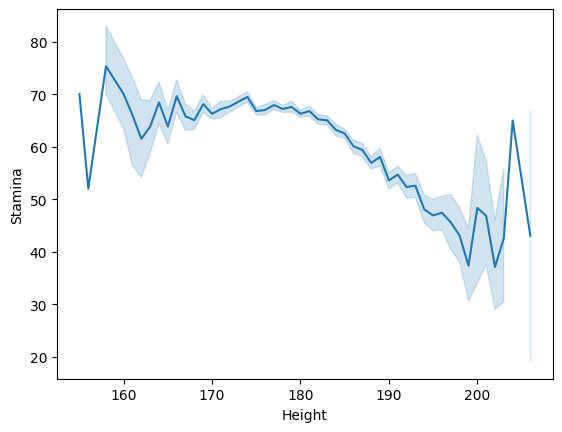

In [ ]:
sns.lineplot(data=df, x='Height', y='Stamina')

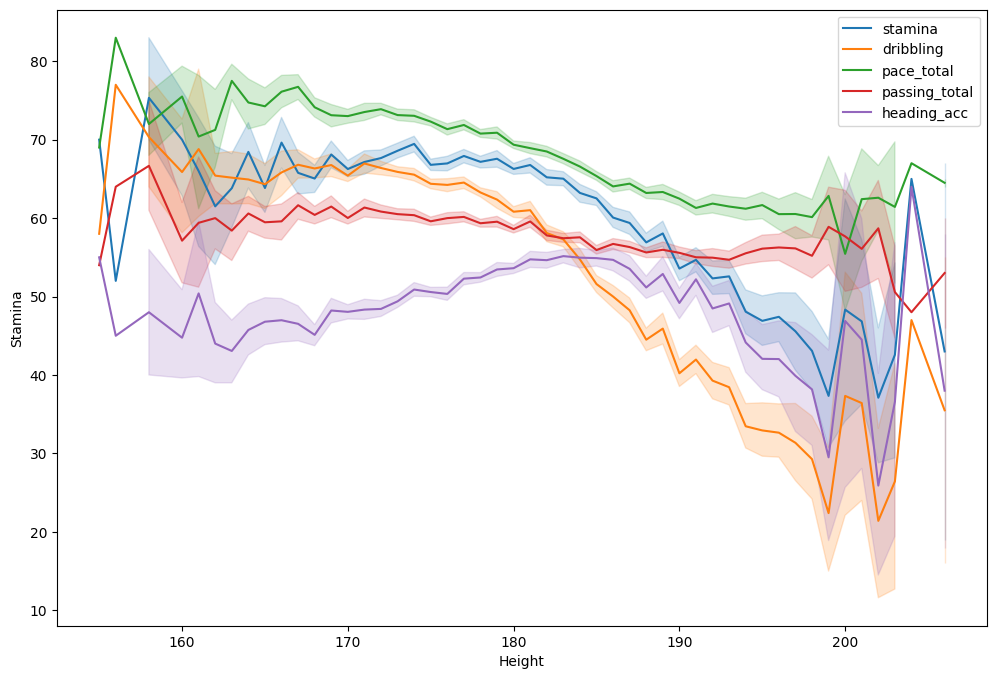

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12,8)
sns.lineplot(data=df, x='Height', y='Stamina', label = 'stamina')
sns.lineplot(data=df, x='Height', y='Dribbling', legend='brief', label = 'dribbling')
sns.lineplot(data=df, x='Height', y='PaceTotal', legend='brief', label = 'pace_total')
sns.lineplot(data=df, x='Height', y='PassingTotal', legend='brief', label = 'passing_total')
sns.lineplot(data=df, x='Height', y='HeadingAccuracy', legend='brief', label = 'heading_acc')
plt.legend()

#Show if there is a wage and overall of thw players

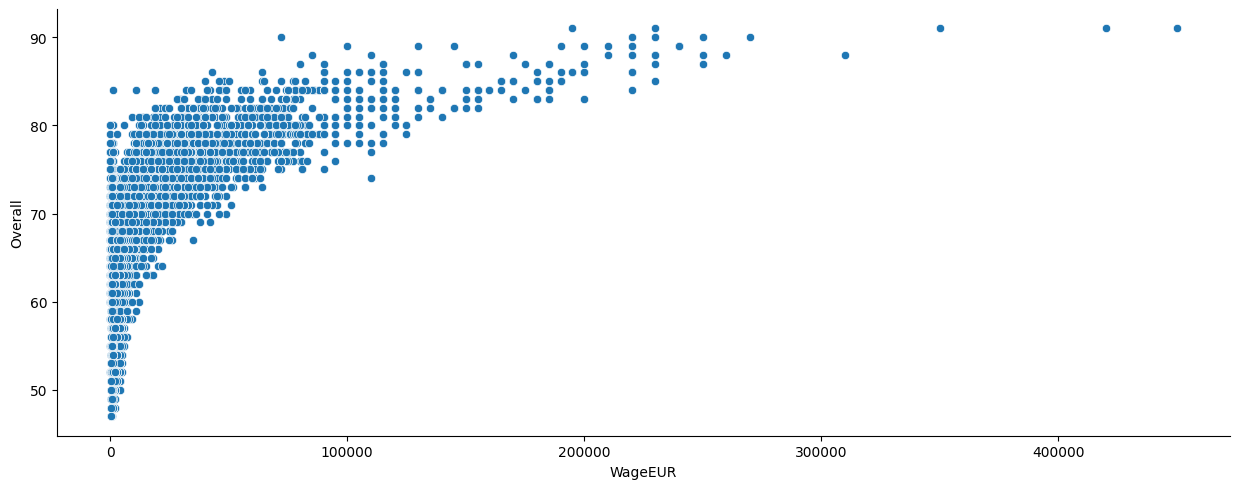

In [ ]:
sns.relplot(x='WageEUR', y='Overall', data=df, aspect=2.5)

#Show the top quickest player

In [ ]:
top_acc = df.sort_values(by = ['Acceleration'], ascending=False)

In [ ]:
top_acc

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Growth,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,France,91,95,4,...,80,88,26,34,32,13,5,7,11,6
402,253149,J. Frimpong,Jeremie Frimpong,21,171,64,Netherlands,80,86,6,...,39,71,73,77,74,12,7,8,13,14
892,232104,D. James,Daniel James,24,171,76,Wales,77,82,5,...,64,67,54,45,34,7,6,11,15,9
651,213956,Adama Traoré,Adama Traoré Diarra,26,178,86,Spain,79,80,1,...,47,73,37,38,35,13,9,11,12,7
141,234396,A. Davies,Alphonso Davies,21,185,77,Canada,84,89,5,...,60,78,76,77,71,11,11,6,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14922,269521,Hou Yu,Yu Hou,31,192,80,China PR,60,60,0,...,10,26,9,13,12,64,59,49,58,63
18249,269542,Li Yijia,Yijia Li,21,189,77,China PR,51,56,5,...,15,21,15,15,13,51,53,52,51,50
18431,258888,D. Robson,David Robson,20,181,73,Wales,50,63,13,...,14,32,6,13,12,54,50,50,48,47
16336,259668,A. Pierre,Alexandre Pierre,21,190,83,Haiti,58,72,14,...,19,39,7,11,12,59,56,62,58,59


<ipython-input-56-7078ff83c004>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Name', y = 'Acceleration', data = top_acc.head(20), palette='Blues_d')


<Axes: xlabel='Name', ylabel='Acceleration'>

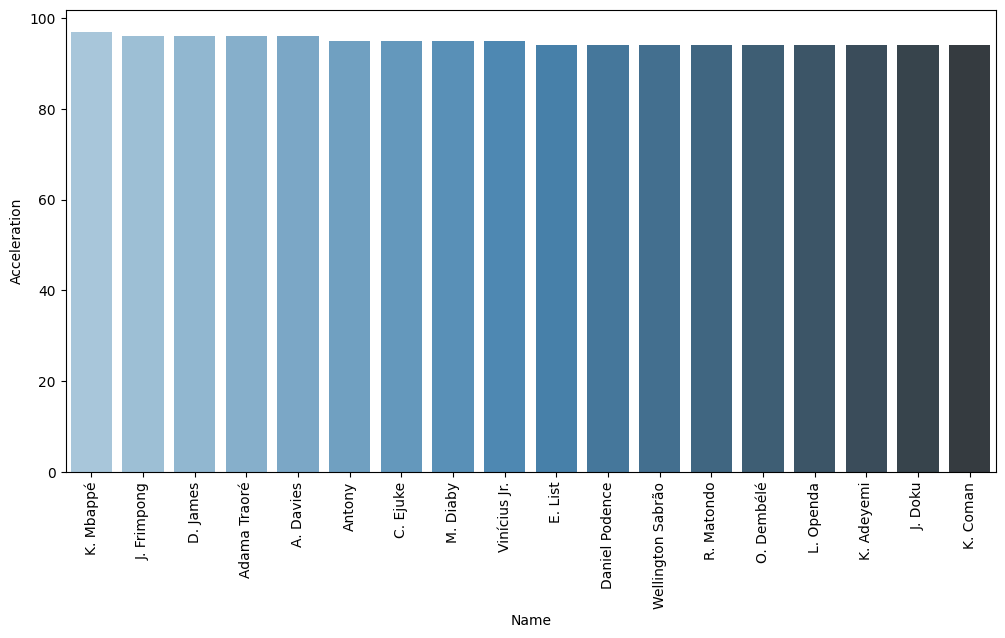

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.barplot(x = 'Name', y = 'Acceleration', data = top_acc.head(20), palette='Blues_d')


#Determine if there is a relation between the Position of player and his Wage & Value

<Axes: xlabel='BestPosition', ylabel='WageEUR'>

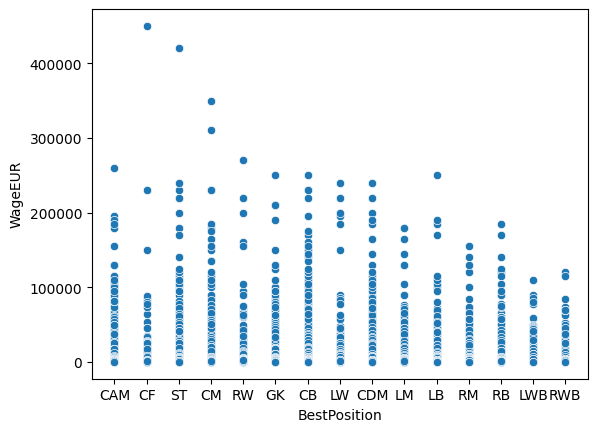

In [ ]:
sns.scatterplot(x = 'BestPosition', y = 'WageEUR', data=df)

#Nationality Vs Wage

In [ ]:
top_wages = df.sort_values(by = ['WageEUR'], ascending=False)

In [ ]:
top_wages.head()

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Growth,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
1,165153,K. Benzema,Karim Benzema,34,185,81,France,91,91,0,...,84,90,43,24,18,13,11,5,5,7
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,Poland,91,91,0,...,90,88,35,42,19,15,6,12,8,10
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,Belgium,91,91,0,...,83,89,68,65,53,15,13,5,10,13
28,182521,T. Kroos,Toni Kroos,32,183,76,Germany,88,88,0,...,73,88,71,73,60,10,11,13,7,10
5,209331,M. Salah,Mohamed Salah,30,175,71,Egypt,90,90,0,...,86,92,38,43,41,14,14,9,11,14


In [ ]:
top_wages.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'Nationality',
       'Overall', 'Potential', 'Growth', 'TotalStats', 'BaseStats',
       'BestPosition', 'Club', 'ValueEUR', 'WageEUR', 'ReleaseClause',
       'ContractUntil', 'ClubJoined', 'OnLoad', 'PreferredFoot',
       'IntReputation', 'WeakFoot', 'SkillMoves', 'AttackingWorkRate',
       'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
  

<ipython-input-64-b4743c362365>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Nationality', data = top_wages.head(100), palette='Greens_d')


<Axes: xlabel='count', ylabel='Nationality'>

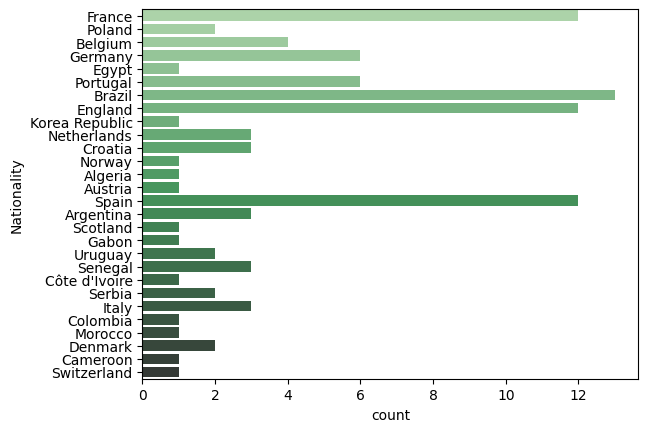

In [ ]:
sns.countplot(y='Nationality', data = top_wages.head(100), palette='Greens_d')

#What is th effect of age on the potential

<Axes: xlabel='Age', ylabel='Potential'>

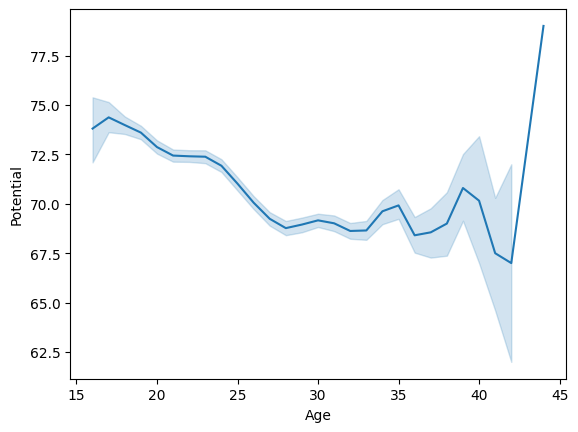

In [ ]:
sns.lineplot(data=df, x='Age', y='Potential')

#Show top 50 players and their clubs

In [68]:
top_rated = df.sort_values(by = ['Overall'], ascending=False)

In [69]:
top_rated.head()

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Growth,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,Lionel Messi,35,169,67,Argentina,91,91,0,...,75,96,20,35,24,6,11,15,14,8
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,Poland,91,91,0,...,90,88,35,42,19,15,6,12,8,10
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,Belgium,91,91,0,...,83,89,68,65,53,15,13,5,10,13
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,France,91,95,4,...,80,88,26,34,32,13,5,7,11,6
1,165153,K. Benzema,Karim Benzema,34,185,81,France,91,91,0,...,84,90,43,24,18,13,11,5,5,7


<Axes: xlabel='Name', ylabel='Overall'>

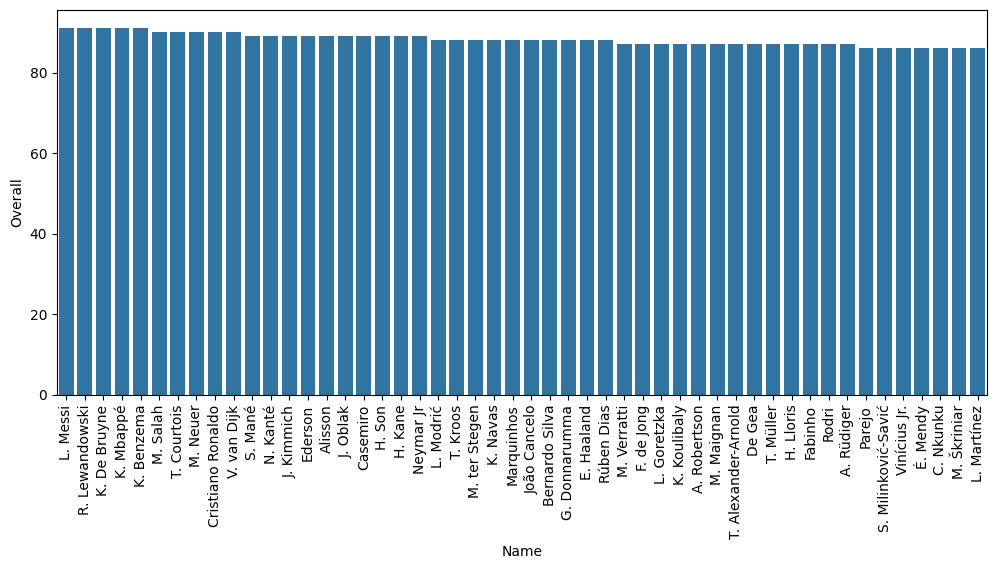

In [75]:
plt.figure(figsize=(12,5))
plt.xticks(rotation = 90)
sns.barplot(x='Name', y='Overall', data = top_rated.head(50))

<Axes: xlabel='Club', ylabel='count'>

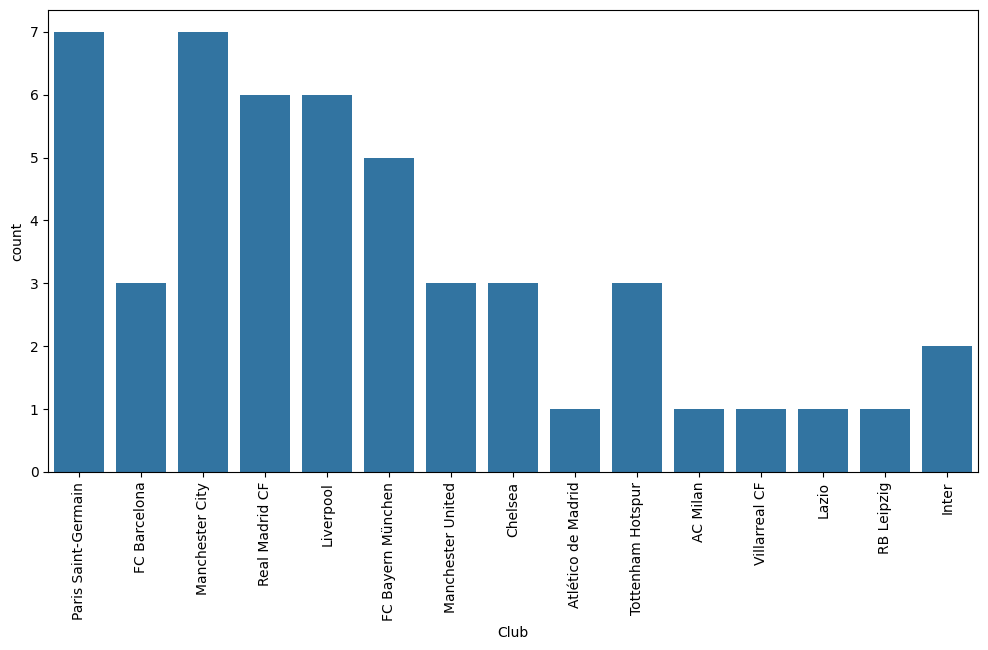

In [77]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.countplot(x = 'Club', data = top_rated.head(50))